In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/spam_ham_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


(   Unnamed: 0 label                                               text  \
 0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
 1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
 2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
 3        4685  spam  Subject: photoshop , windows , office . cheap ...   
 4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   
 
    label_num  
 0          0  
 1          0  
 2          0  
 3          1  
 4          0  ,
 None)

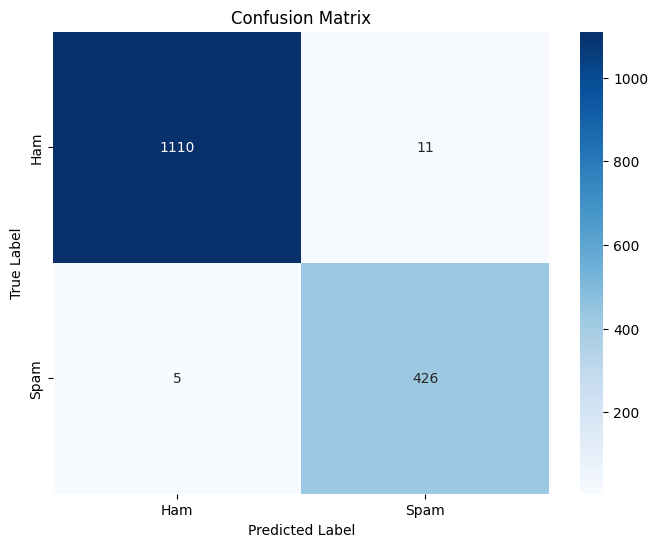

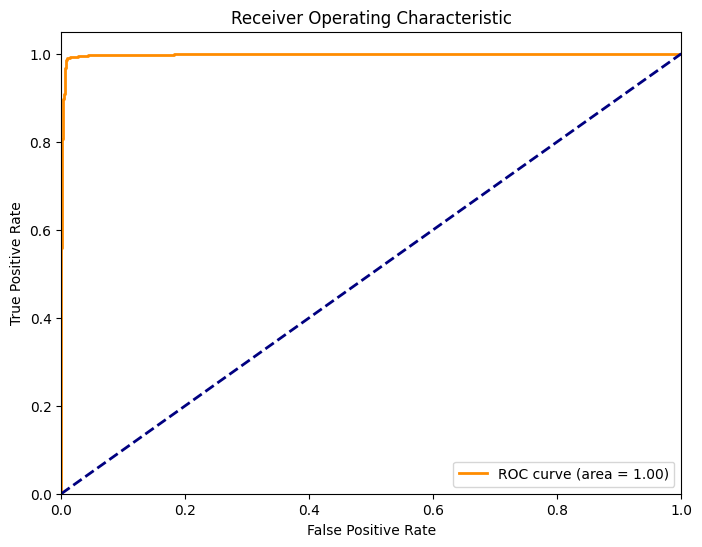

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99      1121\n           1       0.97      0.99      0.98       431\n\n    accuracy                           0.99      1552\n   macro avg       0.99      0.99      0.99      1552\nweighted avg       0.99      0.99      0.99      1552\n'

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Drop unnecessary columns
data = data[['text', 'label_num']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label_num'], test_size=0.3, random_state=42)

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)
y_prob = model.predict_proba(X_test_tfidf)[:, 1]

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

class_report
